In [1]:
# 防止内核挂掉
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
import torch

# 线性回归

## 先准备带有噪声的线性散点

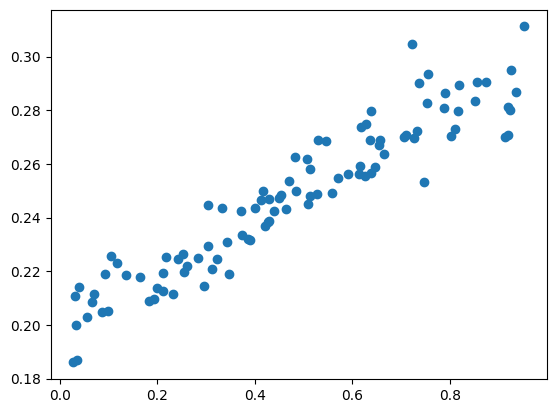

In [3]:
# 构建类似线性分布的数据
x_data = np.random.rand(100)
noise = np.random.normal(0, 0.01, x_data.shape)

y_data = x_data * 0.1 + 0.2 + noise

plt.scatter(x_data, y_data)
plt.show()

## 转换为pytorch模型所需要的参数形式

In [4]:
# 处理数据
x_data = x_data.reshape(-1, 1) # reshape(-1：自动匹配行， 列数)
y_data = y_data.reshape(-1, 1)

# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

# 变成pytorch数据的输入与标签
inputs = Variable(x_data)
target = Variable(y_data)

## 开始构建神经网络的模型

定义一个最基本的单层线性回归网络

In [5]:
## 一般规范

# 自定义类名后继承nn.Module
# 一般把网络中有可学习参数的层定义在初始化函数中
class LinearRegression(nn.Module):
    # 初始化，定义网络结构
    def __init__(self):
        # 初始化父类
        super(LinearRegression, self).__init__()
        # 全连接层
        self.fc = nn.Linear(1, 1) # 输入维数1，输出维数1
        
    # 前向传播，定义网络计算
    def forward(self, x):
        # 把信号(x)传给网络，得到输出值
        out = self.fc(x)
        return out

In [6]:
# 定义模型
model = LinearRegression()

# 定义损失函数
mse_loss = nn.MSELoss() # 均方误差损失(Mean Square Error)

# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1) # 随机梯度下降(Stochastic Gradient Descent)，学习率(learning rate)

## *查看参数

In [7]:
# 查看模型参数
for name, parameter in model.named_parameters():
    print(f'name: {name}, parameter: {parameter}')

name: fc.weight, parameter: Parameter containing:
tensor([[0.6341]], requires_grad=True)
name: fc.bias, parameter: Parameter containing:
tensor([-0.9600], requires_grad=True)


定义完模型后开始训练模型

## 对模型进行训练

In [8]:
# 训练模型1000次
for i in range(1000):
    # 得到模型预测值
    out = model(inputs)
    
    # 计算损失loss
    loss = mse_loss(out, target)
    
    # 梯度清零
    # 不清零则每次训练梯度值都会累加
    optimizer.zero_grad()
    
    # 计算梯度
    loss.backward()
    
    # 修改权值
    optimizer.step()
    
    # 每200次打印一下损失
    if i % 200 == 0:
        print(f'{i}, loss={loss.item()}')

0, loss=0.8391965627670288
200, loss=0.0007295861723832786
400, loss=9.530343959340826e-05
600, loss=8.791740401647985e-05
800, loss=8.783137309364974e-05


看到损失值在逐渐变小

## 查看线性回归的拟合结果

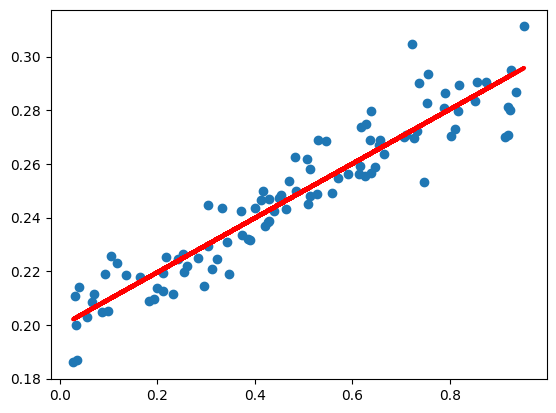

In [9]:
# 训练完后的预测值
y_pred = model(inputs)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(), 'r-', lw=3)
plt.show()